# Práctica 1 - Self-Organising Maps
## Preparación de entorno
#### Importar librerías de código

In [229]:
%reset
# from __future__ import division

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches as patches

%matplotlib inline

Nothing done.


#### Dataset que se va a utilizar para el entrenamiento

In [230]:
# Código para obtener el Dataset que se va a usar en el entrenamiento
valor_min = 0
valor_max = 256     #256 porque el valor máximo es exclusivo, es decir, irá de 0 a 255
valores_color = 3
num_colores = 100
datos = np.random.randint(valor_min, valor_max, (num_colores, valores_color))
print(f"La matriz de 100 colores:\n",datos)







La matriz de 100 colores:
 [[ 29 159 142]
 [150 199 145]
 [ 63  41 101]
 [252 237 169]
 [230  74  43]
 [148 164 185]
 [230 137  64]
 [  6 176  20]
 [111 196 200]
 [ 29 129  39]
 [207  91 165]
 [122  98 204]
 [229  34 115]
 [113 241 129]
 [193 158 239]
 [120 230   7]
 [ 82 145 210]
 [182 215 192]
 [220  51   4]
 [ 67  79   5]
 [110  27 124]
 [125 148 110]
 [ 86 159  60]
 [241  58 162]
 [ 97 139 183]
 [205 109 240]
 [ 22 121 235]
 [ 82 213 120]
 [243 172 225]
 [ 31 164 120]
 [ 74  29 101]
 [171 129  18]
 [ 39 121  26]
 [146  98  96]
 [176  55  80]
 [105 218  96]
 [158 185 148]
 [170 101  33]
 [144 120  40]
 [ 83 255  94]
 [ 22 152 217]
 [156 118  57]
 [ 34 240  33]
 [192  73 164]
 [140 161 164]
 [239 183 187]
 [197 232 212]
 [  5 113  33]
 [ 81 122 166]
 [178  79  33]
 [ 60 123 161]
 [137 102 148]
 [221  96 206]
 [189 226 126]
 [149 191  55]
 [ 42 212   3]
 [162 132 117]
 [153 116 179]
 [250 110 113]
 [214  13 190]
 [147  47  26]
 [104 174 164]
 [208 195 254]
 [ 89  69 200]
 [146  17  34

## SOM Setup
#### Variables definidas por el alumno

In [231]:
# Inicializa tamaño del mapa de Kohonen, número de iteraciones y learning rate
# Inicializa normalizar_datos dependiendo de si tienes que normalizar los datos o no
lado_mapa = 50
periodo = 1000
learning_rate = 0.15
normalizar_datos = True

#### A partir de este punto solo hay cálculos. No se introducen más valores "a mano"

In [232]:
# Establece el numero de entradas del mapa y el número de datos que se van a usar para entrenar. 
# Utiliza una función que obtenga automáticamente los valores a partir del Dataset.

num_entradas = len(datos[0])   #Usamos len para contar el numero de filas y columnas
num_datos = len(datos)     

def obtener_Entrada(datos):
   valor_aleatorio = np.random.randint(0,100)
   return datos[valor_aleatorio]

# Calcula el vecindario inicial. Debe ser la mitad del lado del mapa de Kohonen
vecindario = lado_mapa/2

# Normaliza los datos si fuese necesario dividiendo cada dato por el máximo en la matriz
# Calculamos el valor maximo de la matriz

valor_maximo = 0
for dato in datos:
    for valor in dato:
        if(valor_maximo < valor):
            valor_maximo = valor  
      
if normalizar_datos:
    datos = datos/valor_max    
    
    
# Crea una matriz de pesos con valores random entre 0 y 1. Usa la función random.random de la librería NumPy
#matriz_pesos = np.random.random((dimensiones de la matriz de pesos))

matriz_pesos = np.random.random((lado_mapa*lado_mapa,num_entradas))
print(matriz_pesos)


[[0.9594634  0.23490722 0.43734168]
 [0.17406892 0.51276939 0.3731724 ]
 [0.58001663 0.83523261 0.97985598]
 ...
 [0.81621677 0.25577949 0.82483951]
 [0.17978232 0.00960778 0.3499061 ]
 [0.51517876 0.79651827 0.25135061]]


#### Funciones para entrenar/clasificar

In [233]:
# Función para encontrar la BMU
"""
   Encuentra la BMU para un patrón de entrada.
   Entradas: (patrón_de_entrada, matriz_de_pesos, número_de_entradas)
   Salidas:  (bmu, bmu_idx) tupla donde
               bmu: vector de pesos de la neurona ganadora
               bum_idx: coordenadas de la neurona ganadora
"""

def calcular_bmu(patron_entrada, matriz_pesos, m):
   
   """
    Diferencias es un array de 3 elementos que tendrá el cuadrado de la resta de la entrada menos el peso para calcular la distancia euclídea que
    terminará calculándose en distancia local haciendo la raíz de la suma de los valores anteriores.
   
   """
   distancia_local = 0                      
   distancia_minima = float('inf')
   diferencias = np.zeros(m)
   bmu = []
   bmu_idx = ()

   for i in range(len(matriz_pesos)):
      for j in range(m):
         diferencias[j] = (patron_entrada[j] - matriz_pesos[i,j]) ** 2
      """

      Distancia local tendrá la distancia que se esté calculando en el momento, es decir, en la primera iteración tendrá la distancia de la 
      neurona 0,0 al patrón de entrada, después la de 0,1 y así sucesivamente.
      Si la distancia local es menor que la distancia mínima consideraremos esa neurona como la bmu. En la primera iteración la primera neurona 
      será la bmu ya que distancia mínima está inicializada a infinito.
      
      """
      distancia_local = np.sqrt(np.sum(diferencias))
      if(distancia_local < distancia_minima):
         distancia_minima = distancia_local
         bmu = matriz_pesos[i]
         bmu_idx = (i//lado_mapa,i%lado_mapa)

   # Por último retornamos la bmu y su posición
   return bmu, bmu_idx
           
patron_entrada = obtener_Entrada(datos)     
bmu, bmu_idx = calcular_bmu(patron_entrada, matriz_pesos, num_entradas)
print(f"El patrón de entrada es:\n",patron_entrada)
print(f"Y la BMU es:")
print(f"Valor:",bmu,"\nPosicion:",bmu_idx)

    
    

El patrón de entrada es:
 [0.97265625 0.08203125 0.4921875 ]
Y la BMU es:
Valor: [0.99155422 0.06947938 0.48326321] 
Posicion: (13, 48)


In [234]:
# Función para calcular el descenso del coeficiente de aprendizaje (eta)
"""
   Calcula el Learning Rate (eta) que corresponde a la i-ésima presentación.
   Entradas: (learning_rate_inicial, iteracion, período)
   Salidas:  learning_rate para la iteración i

"""
#Aplicamos la función para calcular la variación de lr
def variacion_learning_rate(lr_inicial, i, n_iteraciones):
    return lr_inicial * (1-(i/n_iteraciones)) 

In [235]:
# Función para calcular el descenso del vecindario (v)
"""
   Calcula el vecindario  (v) que corresponde a la i-ésima presentación.
   Entradas: (vecindario_inicial, iteracion, período)
   Salidas:  lvecindario para la iteración i

"""
def variacion_vecindario(vecindario_inicial, i, n_iteraciones):
   return 1 + vecindario_inicial * (1-(i/n_iteraciones))

In [236]:
# Función para calcular el descenso del coeficiente de aprendizaje (eta) en función de la distancia a la BMU
"""
   Calcula la amortiguación de eta en función de la distancia en el mapa entre una neurona y la BMU.
   Entradas: (distancia_BMU, vecindario_actual)
   Salidas:  amortiguación para la iteración

"""
def decay(distancia_BMU, vecindario_actual):
    return np.exp(-distancia_BMU / (2* (vecindario_actual**2)))

#### Funciones para dibujar la salida de la red

In [237]:
# Función para pintar una matriz de valores como colores RGB
def pintar_mapa(matriz_valores, titulo):
    
    # Reformateamos la matriz de pesos de (100, 3) a (10, 10, 3)
    mapa_colores = matriz_pesos.reshape((lado_mapa, lado_mapa, 3))
    # Mostramos la imagen con los colores RGB
    plt.figure(figsize=(6, 6))
    plt.imshow(mapa_colores, aspect='equal')
    plt.title(titulo)
    plt.axis("off")  # Quitamos los ejes para mejor visualización
    plt.show()





## SOM Entrenamiento

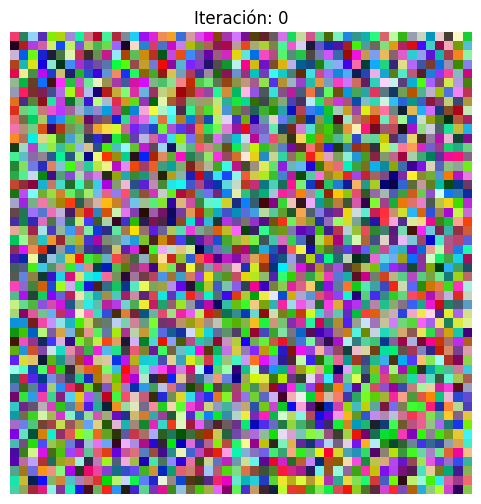

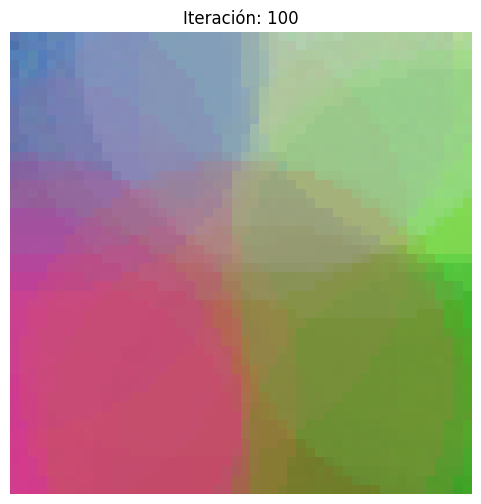

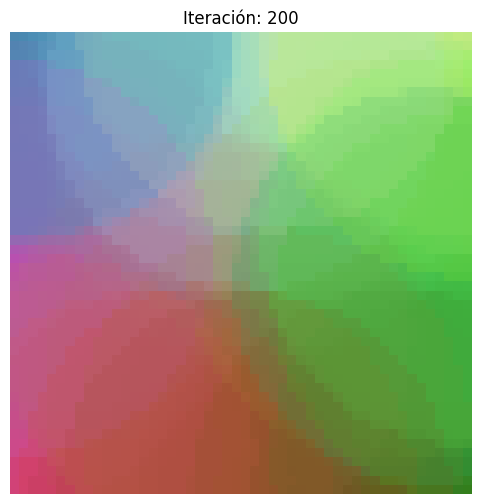

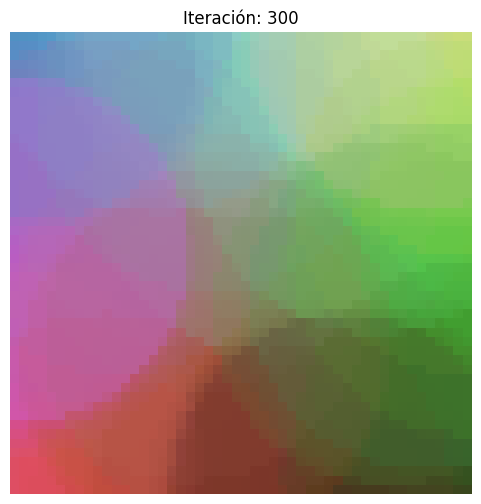

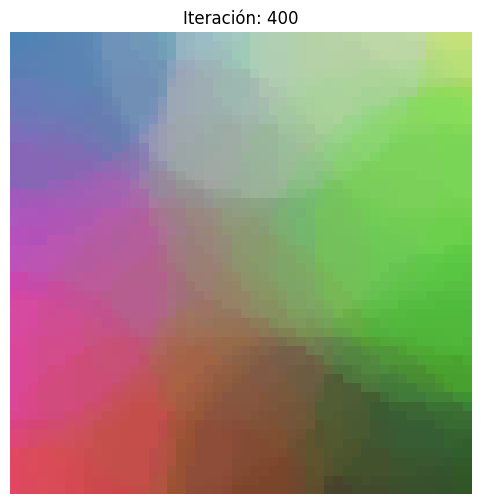

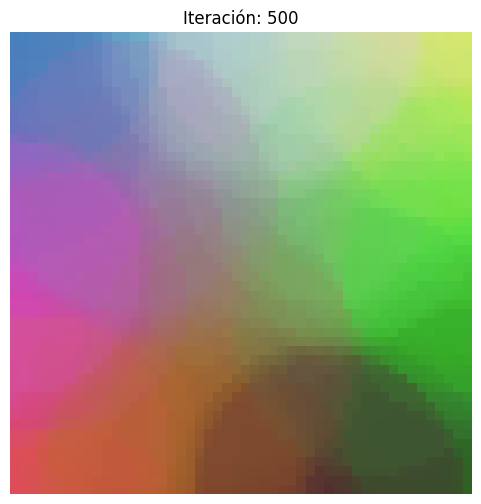

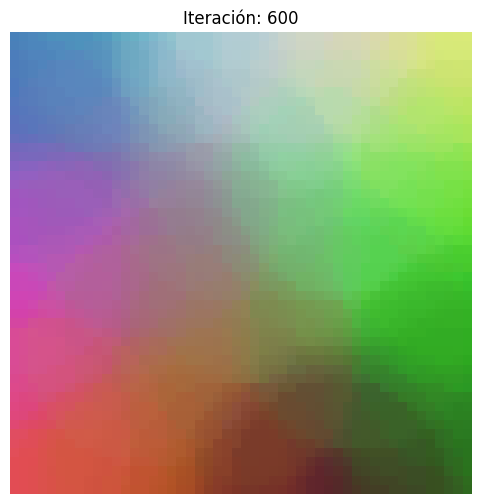

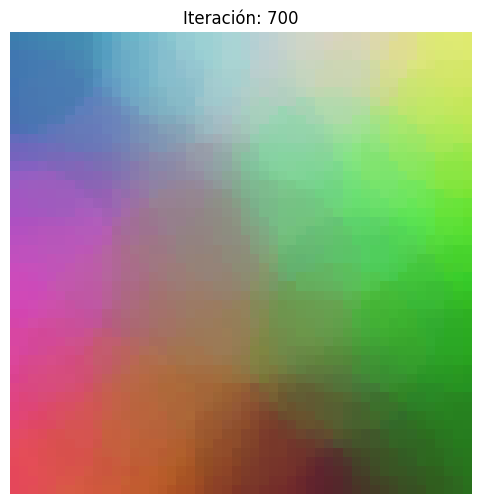

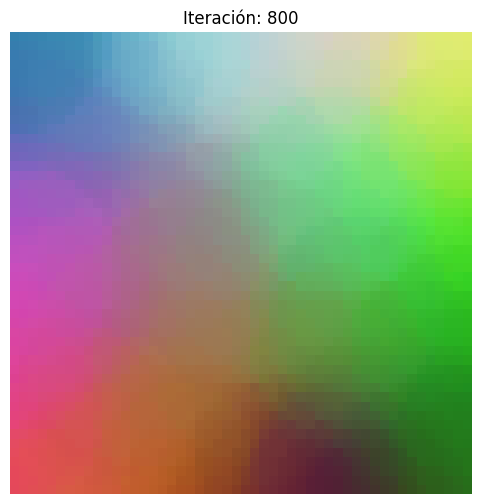

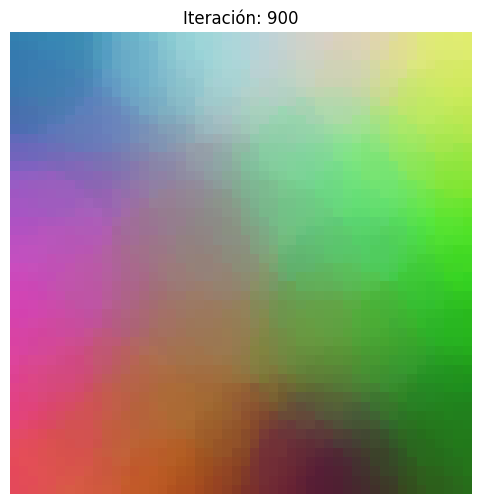

In [238]:
# Bucle principal


for i in range(periodo):
    if i % 100 == 0:
        pintar_mapa(matriz_pesos, f"Iteración: {i}")
    
    # Obtenemos el patrón de entrada ya normalizado
    patron_entrada = obtener_Entrada(datos)
    
    # Encontramos la bmu y calculamos eta y v
    bmu, bmu_idx = calcular_bmu(patron_entrada, matriz_pesos, num_entradas)
    eta = variacion_learning_rate(learning_rate, i, periodo)
    v = variacion_vecindario(vecindario, i, periodo)
    
    # Actualiza la matriz de pesos
    for j in range(len(matriz_pesos)):
        # Coordenadas de la neurona en la matriz
        x = j // lado_mapa
        y = j % lado_mapa
        
        # Calcula la distancia euclídea 2D respecto a la BMU
        distancia_BMU = np.sqrt((x - bmu_idx[0])**2 + (y - bmu_idx[1])**2)
        
        # Si está dentro del vecindario, actualizar pesos
        if distancia_BMU <= v:
            amortiguacion = decay(distancia_BMU, v)
            matriz_pesos[j] += eta * amortiguacion * (patron_entrada - matriz_pesos[j])



    

    



## SOM Clasificación

In [239]:
# Clasifica los patrones de entrenamiento con la matriz de pesos recién entrenada



## SOM Prueba

In [240]:
# Clasifica nuevos patrones

